In [1]:
import boto3
import io
import pandas as pd
import getpass
import json # read in dictionary format credentials

In [2]:
with open("aws_credential.txt", 'r') as file:
    aws_credential=json.load(file)

In [3]:
s3=boto3.Session(
    profile_name = None, 
    region_name = 'us-east-2').client(
    's3',
    aws_access_key_id=aws_credential['access_key'],
    aws_secret_access_key=aws_credential['secret_key'])

In [4]:
file_counts=len(s3.list_objects(Bucket = aws_credential['bucket'])['Contents'])
print(f'The bucket currently has {file_counts} objects.')

The bucket currently has 85 objects.


In [6]:
s3.put_object(Bucket=aws_credential['bucket'], Key=('messy_data/visa_scraped'))

{'ResponseMetadata': {'RequestId': 'FYC0WY5DZ9WEXQ9T',
  'HostId': 'eF5/kxB1dF+iNE/LjH2X8U4H/d5pj4ojP7AgqAQoWUVeGCItEXmCXtfVoSx/Hiu8TpaZiEkP993OjukktItFjg==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'eF5/kxB1dF+iNE/LjH2X8U4H/d5pj4ojP7AgqAQoWUVeGCItEXmCXtfVoSx/Hiu8TpaZiEkP993OjukktItFjg==',
   'x-amz-request-id': 'FYC0WY5DZ9WEXQ9T',
   'date': 'Tue, 01 Apr 2025 02:38:03 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'x-amz-checksum-crc64nvme': 'AAAAAAAAAAA=',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
 'ServerSideEncryption': 'AES256'}

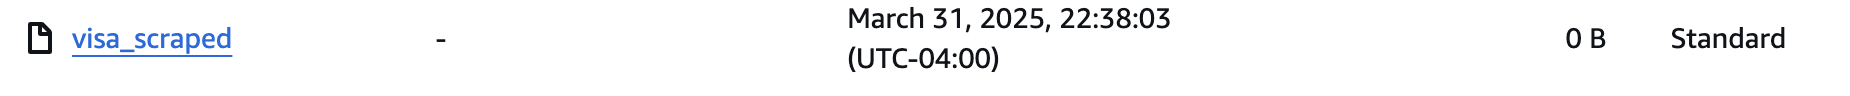